In [3]:
pip install pandas numpy matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for our plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Load the datasets
# Make sure you have downloaded the files and placed them in the same directory
# or provide the correct path.
try:
    matches_df = pd.read_csv('matches.csv')
    deliveries_df = pd.read_csv('deliveries.csv')
except FileNotFoundError:
    print("Error: Make sure 'matches.csv' and 'deliveries.csv' are in the correct folder.")
    # Handle the error as needed

# Display the first 5 rows of each dataframe to understand the data
print("Matches DataFrame Head:")
print(matches_df.head())

print("\nDeliveries DataFrame Head:")
print(deliveries_df.head())

# Get basic info
print("\nMatches Info:")
matches_df.info()

print("\nDeliveries Info:")
deliveries_df.info()

Matches DataFrame Head:
       id        city        date player_of_match  \
0  335982   Bangalore  18-04-2008     BB McCullum   
1  335983  Chandigarh  19-04-2008      MEK Hussey   
2  335984       Delhi  19-04-2008     MF Maharoof   
3  335985      Mumbai  20-04-2008      MV Boucher   
4  335986     Kolkata  20-04-2008       DJ Hussey   

                                        venue  neutral_venue  \
0                       M Chinnaswamy Stadium              0   
1  Punjab Cricket Association Stadium, Mohali              0   
2                            Feroz Shah Kotla              0   
3                            Wankhede Stadium              0   
4                                Eden Gardens              0   

                         team1                        team2  \
0  Royal Challengers Bangalore        Kolkata Knight Riders   
1              Kings XI Punjab          Chennai Super Kings   
2             Delhi Daredevils             Rajasthan Royals   
3               Mumb


Total Matches Won by Each Team:
winner
Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_6800\284027272.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=matches_df['winner'], order=team_wins.index, palette='viridis')


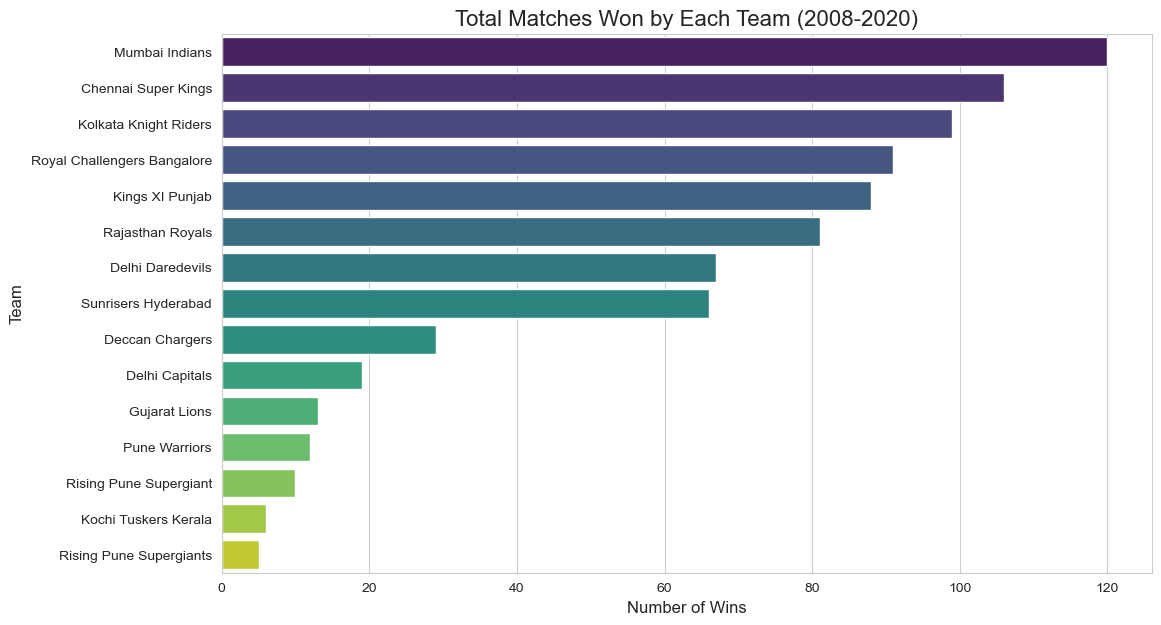

In [14]:
# Get the count of wins for each team
team_wins = matches_df['winner'].value_counts()

print("\nTotal Matches Won by Each Team:")
print(team_wins)

# Plot the results
plt.figure(figsize=(12, 7))
sns.countplot(y=matches_df['winner'], order=team_wins.index, palette='viridis')
plt.title('Total Matches Won by Each Team (2008-2020)', fontsize=16)
plt.xlabel('Number of Wins', fontsize=12)
plt.ylabel('Team', fontsize=12)
plt.show()


Top 10 Player of the Match Winners:
player_of_match
AB de Villiers    23
CH Gayle          22
RG Sharma         18
DA Warner         17
MS Dhoni          17
SR Watson         16
YK Pathan         16
SK Raina          14
V Kohli           13
G Gambhir         13
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_10908\3811672604.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pom_winners.index, y=pom_winners.values, palette='plasma')


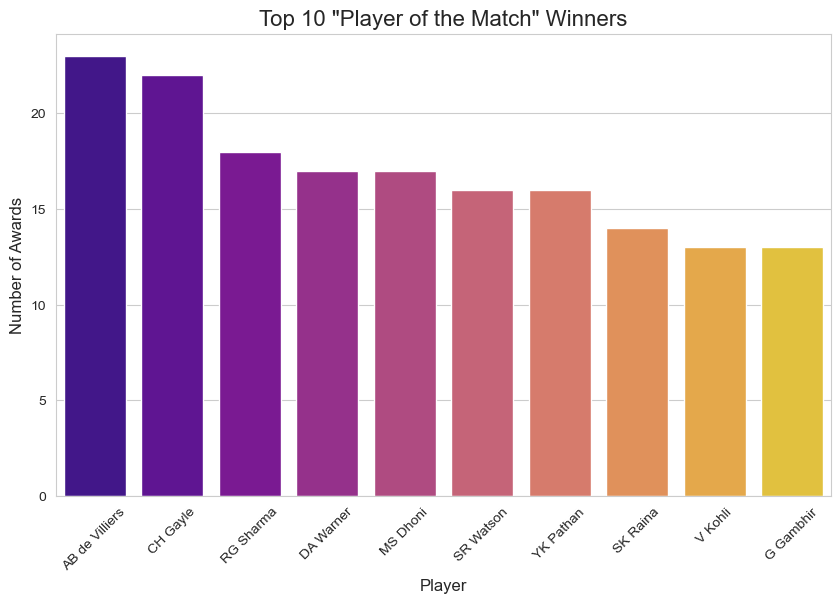

In [6]:
# Get the count for 'player_of_match'
pom_winners = matches_df['player_of_match'].value_counts().head(10)

print("\nTop 10 Player of the Match Winners:")
print(pom_winners)

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x=pom_winners.index, y=pom_winners.values, palette='plasma')
plt.title('Top 10 "Player of the Match" Winners', fontsize=16)
plt.xlabel('Player', fontsize=12)
plt.ylabel('Number of Awards', fontsize=12)
plt.xticks(rotation=45)
plt.show()


Top 10 All-Time Run Scorers:
batsman
V Kohli           5878
SK Raina          5368
DA Warner         5254
RG Sharma         5230
S Dhawan          5197
AB de Villiers    4849
CH Gayle          4772
MS Dhoni          4632
RV Uthappa        4607
G Gambhir         4217
Name: batsman_runs, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_10908\3970581495.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_scorers.index, y=top_scorers.values, palette='cool')


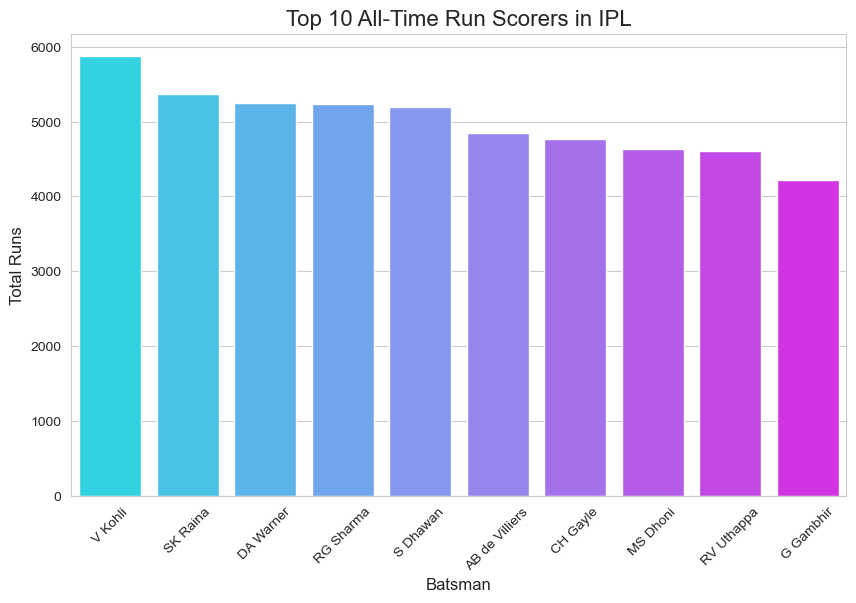

In [7]:
# Group by batsman and sum their runs
top_scorers = deliveries_df.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10)

print("\nTop 10 All-Time Run Scorers:")
print(top_scorers)

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x=top_scorers.index, y=top_scorers.values, palette='cool')
plt.title('Top 10 All-Time Run Scorers in IPL', fontsize=16)
plt.xlabel('Batsman', fontsize=12)
plt.ylabel('Total Runs', fontsize=12)
plt.xticks(rotation=45)
plt.show()


Does Toss Winner Win the Match?
toss_match_win
Yes    418
No     398
Name: count, dtype: int64


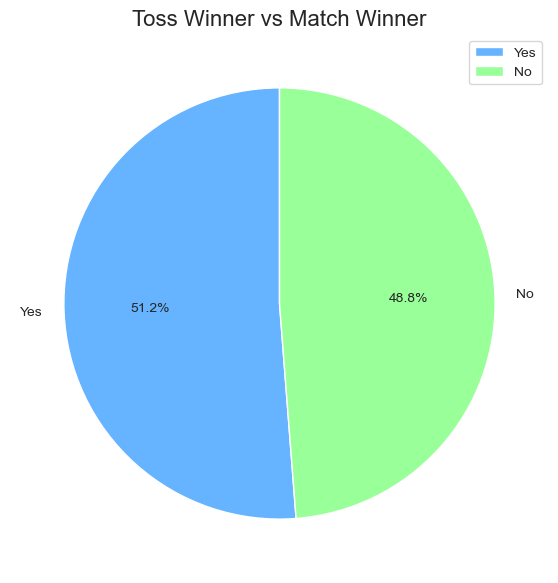

In [8]:
# Create a new column to check if toss winner is also the match winner
matches_df['toss_match_win'] = np.where(matches_df['toss_winner'] == matches_df['winner'], 'Yes', 'No')

# Count the occurrences
toss_win_count = matches_df['toss_match_win'].value_counts()

print("\nDoes Toss Winner Win the Match?")
print(toss_win_count)

# Plot as a pie chart
plt.figure(figsize=(7, 7))
plt.pie(toss_win_count.values, 
        labels=toss_win_count.index, 
        autopct='%1.1f%%', 
        startangle=90,
        colors=['#66b3ff','#99ff99'])
plt.title('Toss Winner vs Match Winner', fontsize=16)
plt.legend()
plt.show()

In [4]:
df = pd.read_csv("deliveries.csv")
df = pd.read_csv("matches.csv")
print(df.head())   # to check the first few rows

       id        city        date player_of_match  \
0  335982   Bangalore  18-04-2008     BB McCullum   
1  335983  Chandigarh  19-04-2008      MEK Hussey   
2  335984       Delhi  19-04-2008     MF Maharoof   
3  335985      Mumbai  20-04-2008      MV Boucher   
4  335986     Kolkata  20-04-2008       DJ Hussey   

                                        venue  neutral_venue  \
0                       M Chinnaswamy Stadium              0   
1  Punjab Cricket Association Stadium, Mohali              0   
2                            Feroz Shah Kotla              0   
3                            Wankhede Stadium              0   
4                                Eden Gardens              0   

                         team1                        team2  \
0  Royal Challengers Bangalore        Kolkata Knight Riders   
1              Kings XI Punjab          Chennai Super Kings   
2             Delhi Daredevils             Rajasthan Royals   
3               Mumbai Indians  Royal Challe

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [16]:
df.isna().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [17]:
df.dropna().sum()

id                                                          14162200
city               DelhiKolkataCape TownDurbanCenturionKochiKolka...
date               17-05-200818-05-200819-04-200921-04-200907-05-...
player_of_match    DPMD JayawardeneM NtiniDL VettoriCH GayleML Ha...
venue              Feroz Shah KotlaEden GardensNewlandsKingsmeadS...
neutral_venue                                                      3
team1              Delhi DaredevilsKolkata Knight RidersDelhi Dar...
team2              Kings XI PunjabChennai Super KingsKings XI Pun...
toss_winner        Delhi DaredevilsKolkata Knight RidersDelhi Dar...
toss_decision      batbatfieldfieldbatfieldbatfieldfieldfieldbatf...
winner             Kings XI PunjabChennai Super KingsDelhi Darede...
result             runsrunswicketsrunsrunswicketsrunswicketswicke...
result_margin                                                  266.0
eliminator                                       NNNNNNNNNNNNNNNNNNN
method             D/LD/LD/LD/LD/L

In [20]:
df=df.drop(["eliminator"], axis=1)

In [21]:
df.head()

,id,neutral_venue,result_margin
0,335982,0,140.0
1,335983,0,33.0
2,335984,0,9.0
3,335985,0,5.0
4,335986,0,5.0


In [22]:
df.describe()

,id,neutral_venue,result_margin
count,8.160000e+02,816.000000,799.000000
mean,7.563496e+05,0.094363,17.321652
std,3.058943e+05,0.292512,22.068427
min,3.359820e+05,0.000000,1.000000
25%,5.012278e+05,0.000000,6.000000
50%,7.292980e+05,0.000000,8.000000
75%,1.082626e+06,0.000000,19.500000
max,1.237181e+06,1.000000,146.000000


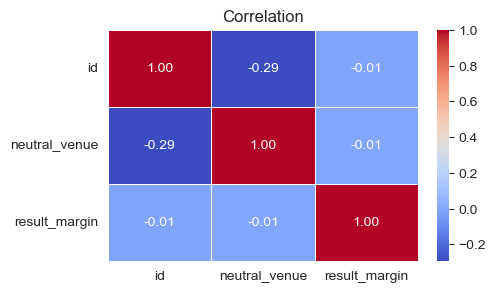

In [23]:
correlation_matrix = df.corr()
df.corr(numeric_only=True)
plt.figure(figsize=(5, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation")
plt.show()

In [40]:
x = ['id']             
y = ['result_margin']
df.head()

,id,neutral_venue,result_margin
0,335982,0,140.0
1,335983,0,33.0
2,335984,0,9.0
3,335985,0,5.0
4,335986,0,5.0


In [41]:
df[x]

,id
0,335982
1,335983
2,335984
3,335985
4,335986
...,...
811,1216547
812,1237177
813,1237178
814,1237180


In [42]:
df[y]

,result_margin
0,140.0
1,33.0
2,9.0
3,5.0
4,5.0
...,...
811,NaN
812,57.0
813,6.0
814,17.0


In [51]:
Y_train.isnull().sum()

result_margin    12
dtype: int64

In [55]:
X_train.isnull().sum()

id    571
dtype: int64

In [56]:
X_train = X_train.dropna()

In [57]:
X_train = X_train[Y_train.notnull()]
Y_train = Y_train[Y_train.notnull()]

In [59]:
print(X_train.shape)
print(Y_train.shape)

(0, 1)
(571, 1)


In [61]:
X_train = X_train[Y_train.notnull()]
Y_train = Y_train[Y_train.notnull()]

In [64]:
print(X_train.shape, Y_train.shape)
print(Y_train.head())

(0, 1) (571, 1)
     result_margin
5              6.0
522            7.0
716            8.0
83             9.0
772           49.0


In [66]:
print(df.columns)

Index(['id', 'neutral_venue', 'result_margin'], dtype='object')


In [68]:
X = df[['id', 'neutral_venue']]   # features
Y = df[['result_margin']]         # target

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42
)

In [70]:
print(X_train.shape, Y_train.shape)

(571, 2) (571, 1)


In [72]:
# Keep only rows where Y_train is not null
non_null_idx = Y_train['result_margin'].notnull()

X_train = X_train[non_null_idx]
Y_train = Y_train[non_null_idx]

In [73]:
lr_model.fit(X_train, Y_train)

LinearRegression()

In [77]:
df['result_margin'] = df['result_margin'].fillna(df['result_margin'].mean())

In [80]:
# Drop rows where target is missing
df = df.dropna(subset=['result_margin'])

# Optional: drop any rows where features have NaN too
df = df.dropna(subset=['id', 'neutral_venue'])

In [81]:
X = df[['id', 'neutral_venue']]
Y = df['result_margin']  # use Series, not DataFrame with [[]]

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)

score = lr_model.score(X_test, Y_test)
print("R² score:", score)

R² score: -0.021712808215664348


In [83]:
y_pred = lr_model.predict(X_test)

In [85]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = lr_model.predict(X_test)

mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 531.8036284801279
R² Score: -0.021712808215664348


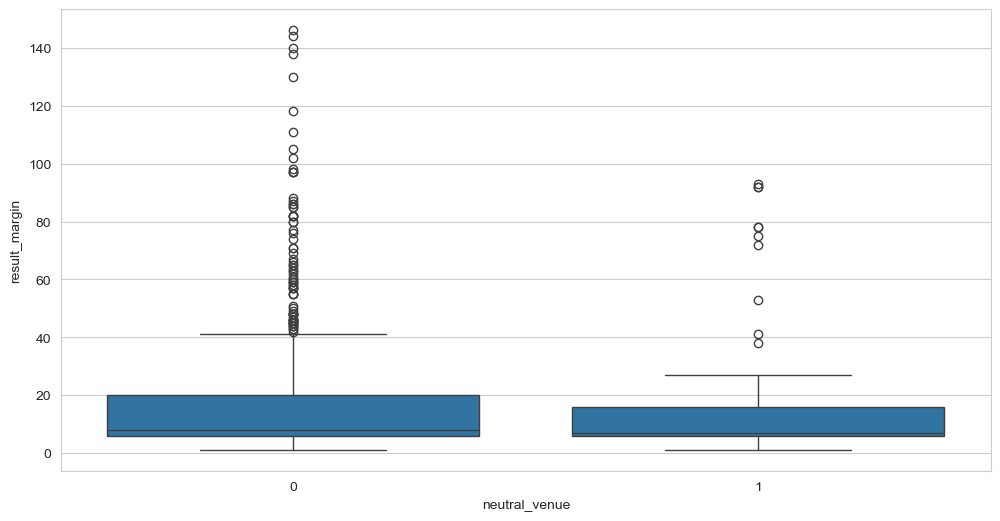

In [89]:
sns.boxplot(x='neutral_venue', y='result_margin', data=df)
plt.show()

In [90]:
y_pred = lr_model.predict(X_test)
y_pred

array([18.22475552, 18.08443454, 16.20888913, 18.22466324, 16.79672266,
       16.09543332, 18.22474659, 17.93663002, 17.93662407, 16.7967941 ,
       14.56807261, 16.2089189 , 16.33340655, 16.0339962 , 18.08455659,
       17.5318487 , 18.08438394, 14.56794163, 17.24676545, 16.79676433,
       18.46911685, 14.56806963, 18.22462752, 16.0955256 , 18.71651149,
       18.71653828, 16.7966274 , 18.22471682, 18.22471384, 14.56803391,
       17.93660025, 18.22465133, 13.56457775, 13.56460156, 16.21798608,
       18.71655912, 18.2247317 , 17.53175345, 14.56808452, 18.08438989,
       14.56807559, 16.79686554, 17.24668805, 18.4691228 , 18.22463942,
       18.22470789, 16.79677029, 18.08451194, 16.79673457, 16.33344227,
       16.33346906, 16.09546309, 16.20891593, 16.33338273, 17.53187252,
       17.93665384, 17.93651393, 14.5680101 , 17.93663895, 16.33338571,
       16.49408253, 16.4940617 , 18.46917341, 16.49411825, 18.2247198 ,
       18.46903052, 16.4940736 , 18.71647874, 14.56798033, 18.46

In [91]:
Y_test

196    48.000000
299    25.000000
744    17.321652
227    76.000000
541     3.000000
         ...    
442     4.000000
760    16.000000
714    40.000000
666    14.000000
673     6.000000
Name: result_margin, Length: 164, dtype: float64

In [92]:
tab = pd.DataFrame([{"Y actual": y_test, "Y predicted": y_pred}])
tab

,Y actual,Y predicted
0,result_margin 658 31.0 13 ...,"[18.224755517916147, 18.08443454306156, 16.208..."


In [93]:
print('Intercept:',lr_model.intercept_)          
print('Coefficients:',lr_model.coef_)

Intercept: 19.716761691501024
Coefficients: [-2.97674908e-06 -3.98123786e+00]
